In [21]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm

import arch
from arch import arch_model 


In [22]:
plt.style.use('./data/d4sci.mplstyle')

In [23]:
def time_series_plot(y,title=None):
    fig,axs_lst=plt.subplots(3,1)

    if title is not None:
        axs_lst[0].set_title(title)
    y.plot(ax=axs_lst[0])
    sm.tsa.graphics.plot_acf(y,ax=axs_lst[1],alpha=0.5)
    sm.tsa.graphics.plot_pacf(y,ax=axs_lst[2],alpha=0.5)
    plt.tight_layout()


In [24]:
def ARCH(a0,a1):
    y=w=np.random.normal(size=1000)
    Y=np.empty_like(y)

    for t in range(len(y)):
        Y[t]=w[t]*np.sqrt((a0+a1*y[t-1]**2))
    return pd.Series(Y)

In [25]:
Y=ARCH(2,0.5)

c:\Users\w\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


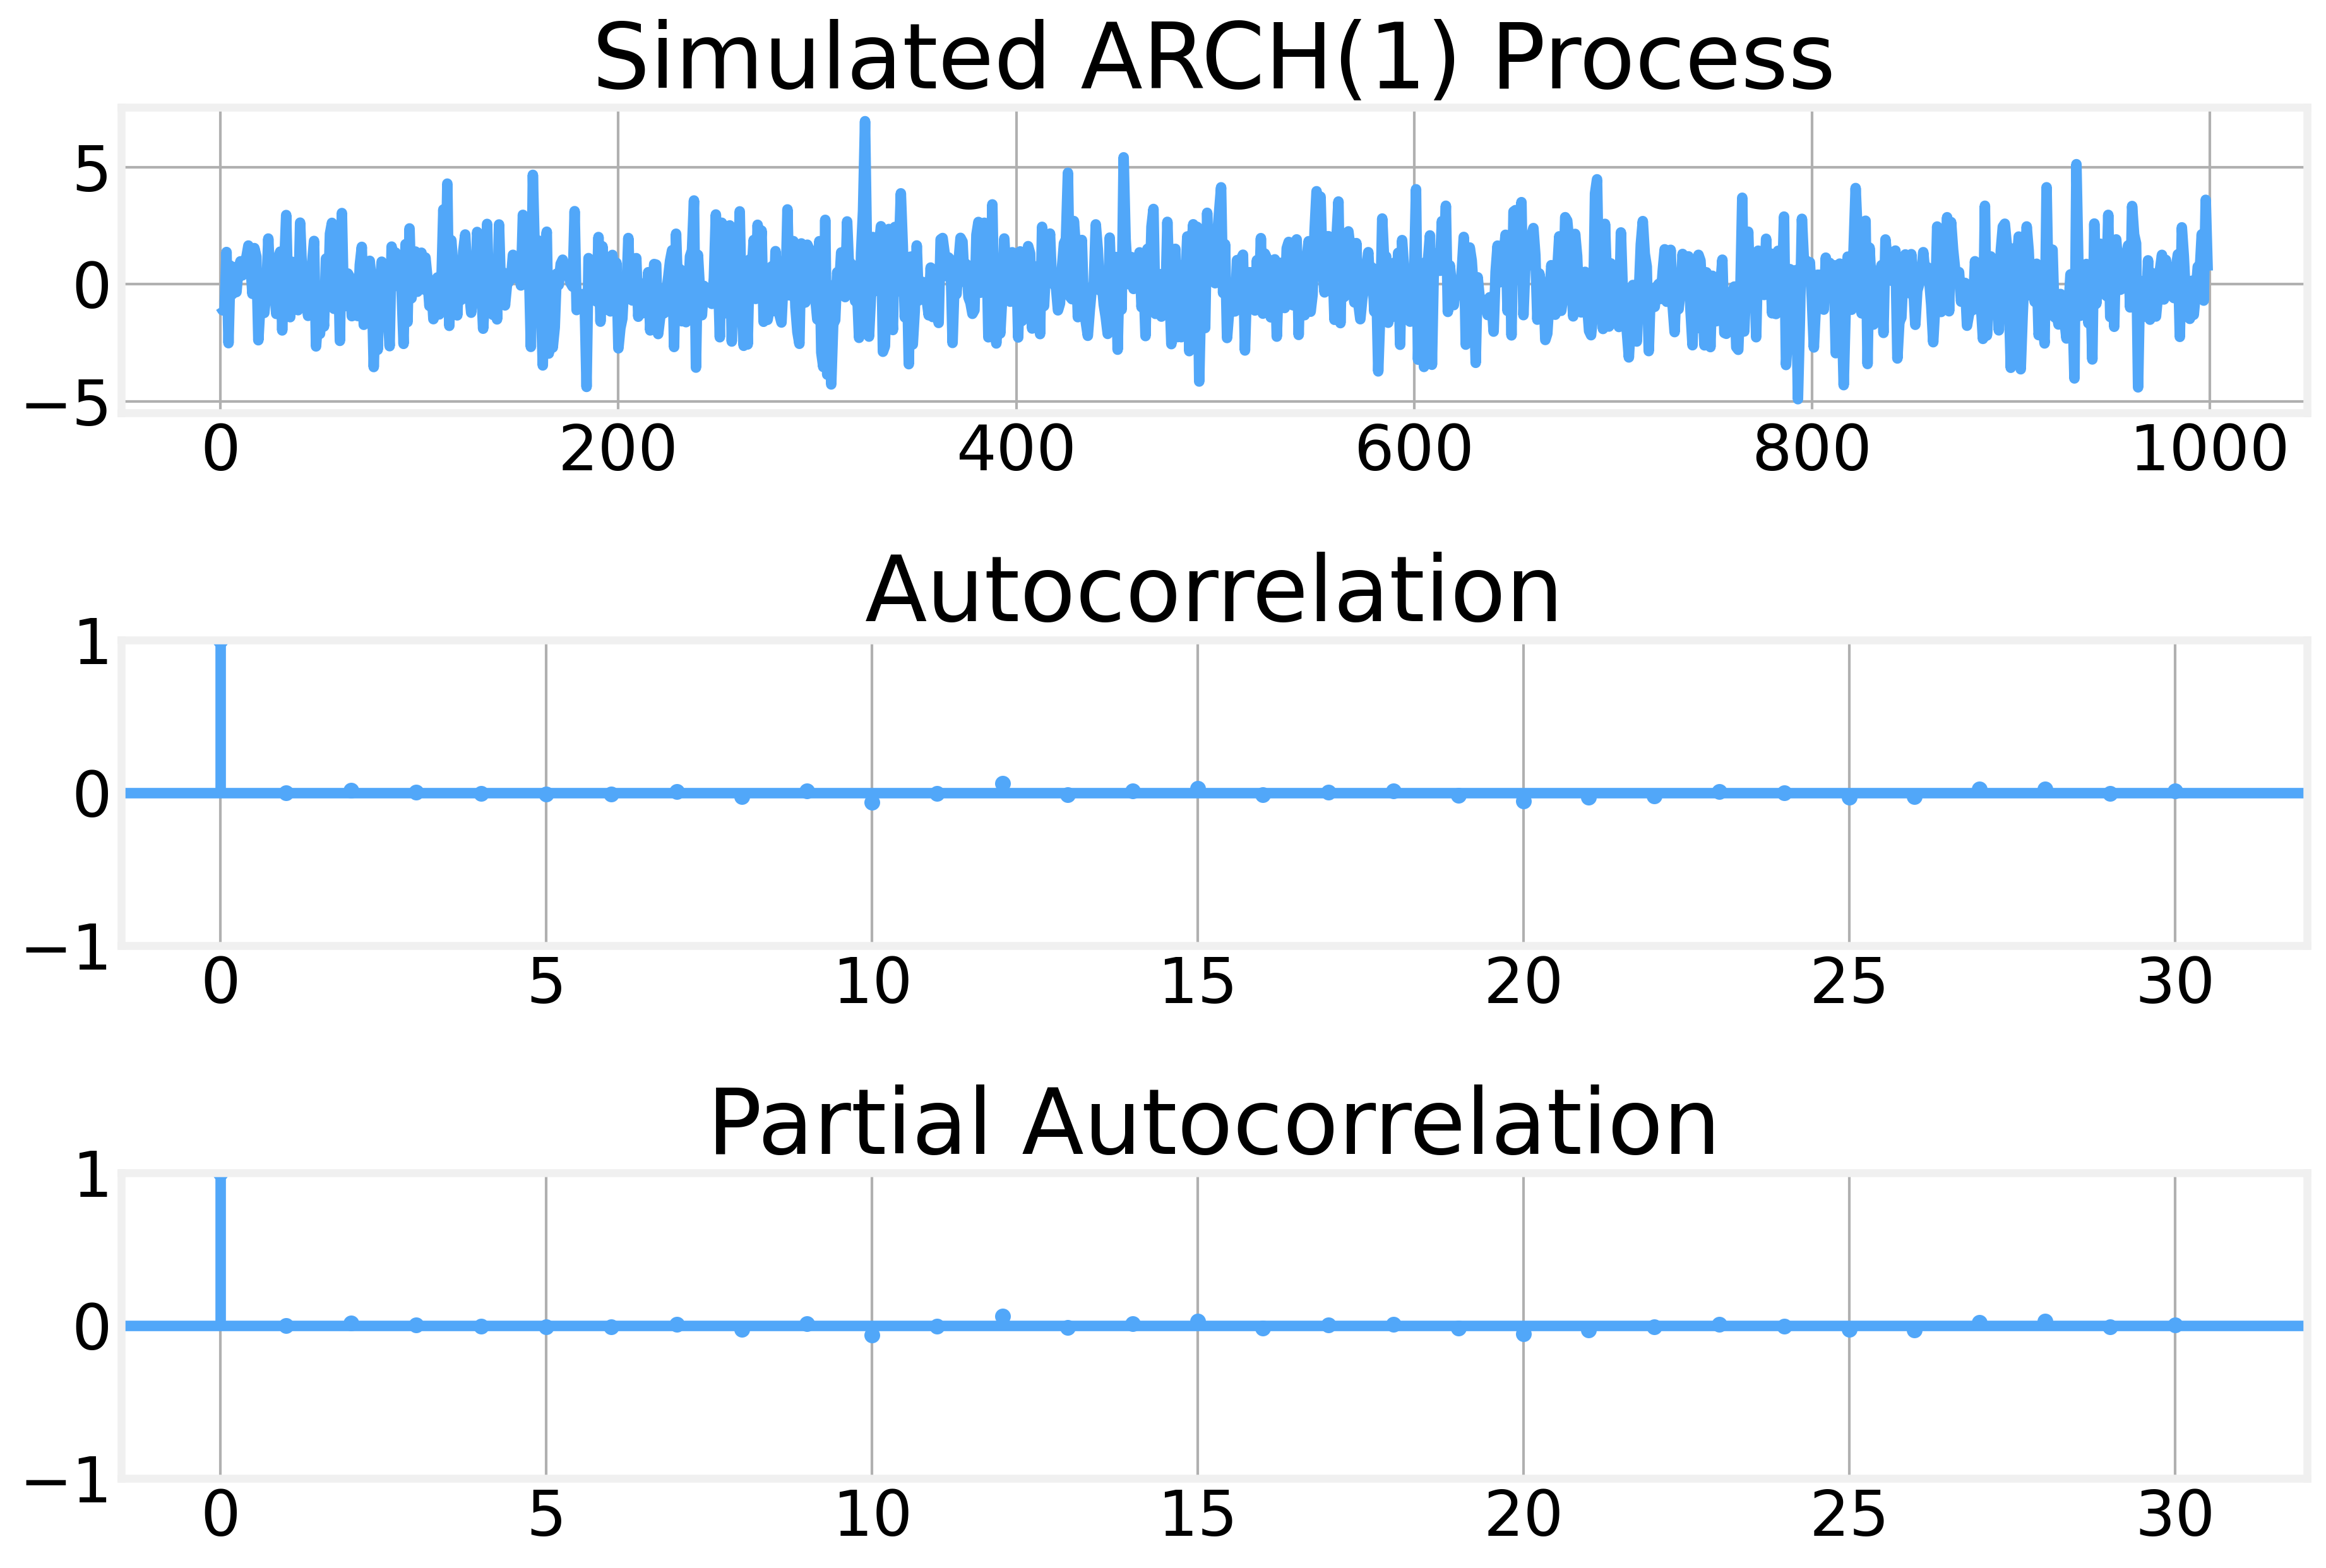

In [26]:
time_series_plot(Y,title='Simulated ARCH(1) Process')

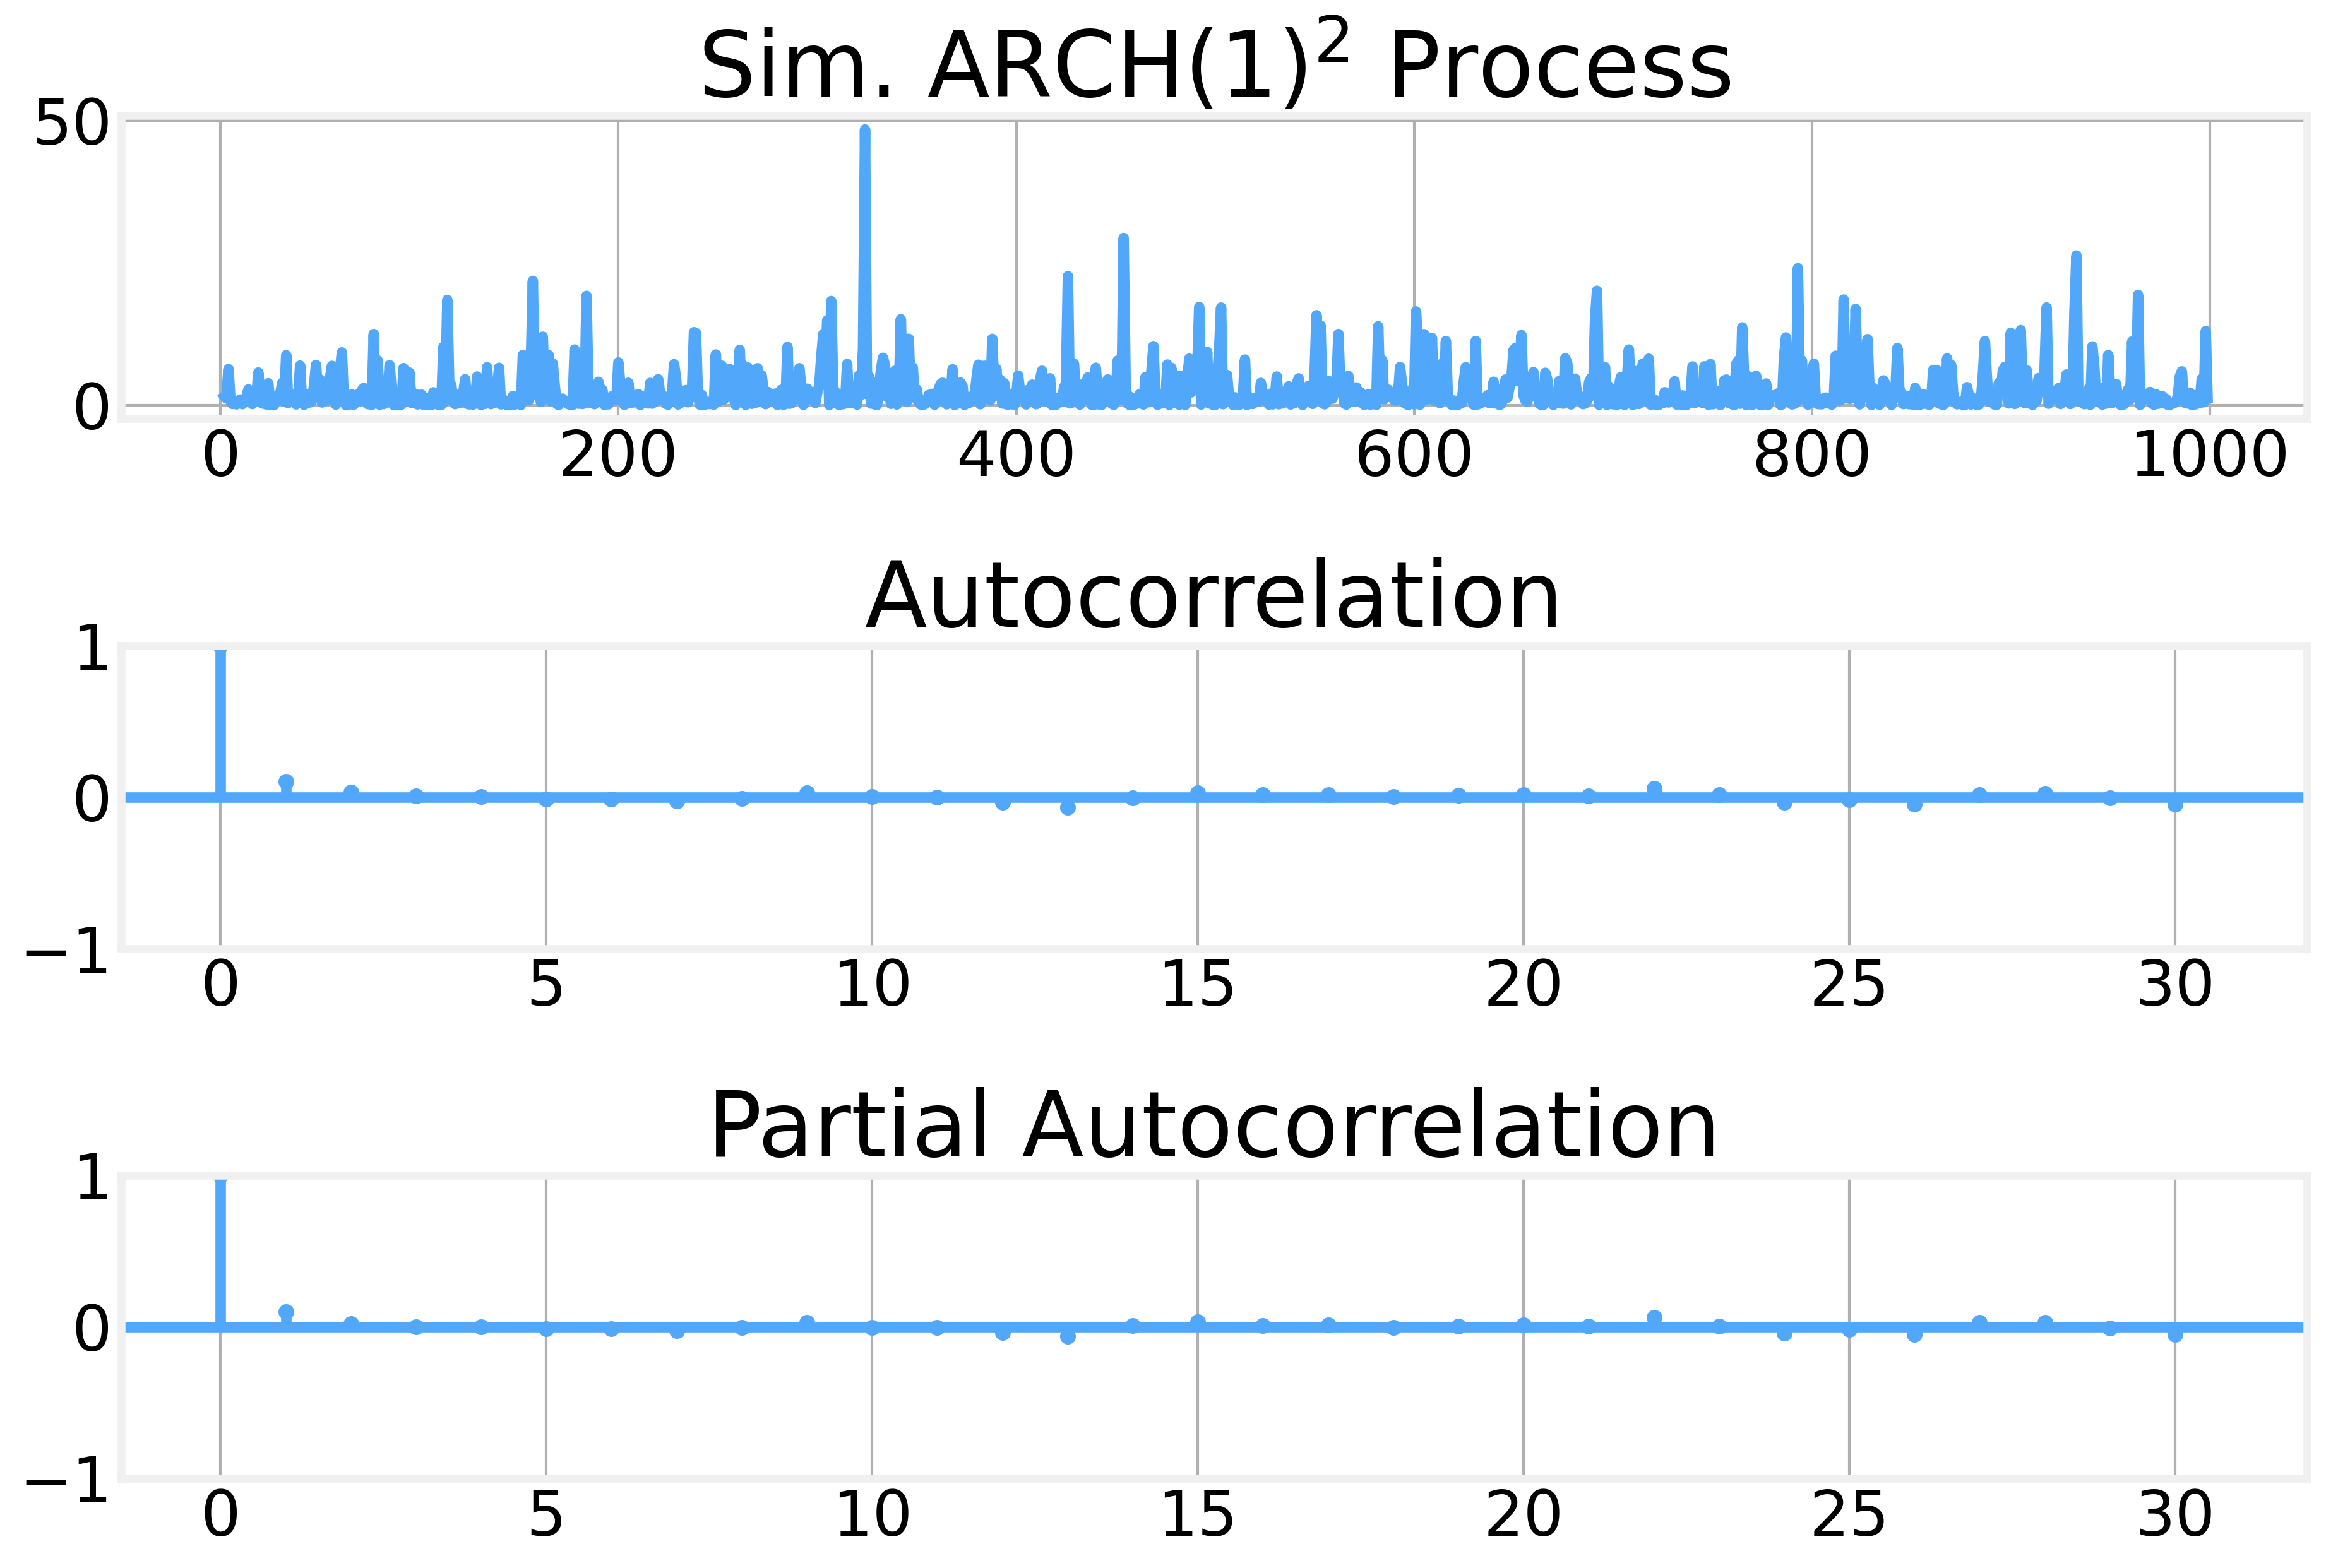

In [27]:
 time_series_plot(Y**2,title="Sim. ARCH(1)${}^2$ Process")

In [30]:
def GARCH (a0,a1,b1):
    n=10000
    w=np.random.normal(size=n)
    eps=np.zeros_like(w)
    sigsq=np.zeros_like(w)

    for i in range(1,n):
        sigsq[i]=a0+a1*(eps[i-1]**2)+b1*sigsq[i-1]
        eps[i]=w[i]*np.sqrt(sigsq[i])
    return pd.Series(eps)

In [31]:
eps=GARCH(0.2,0.5,0.3)

c:\Users\w\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


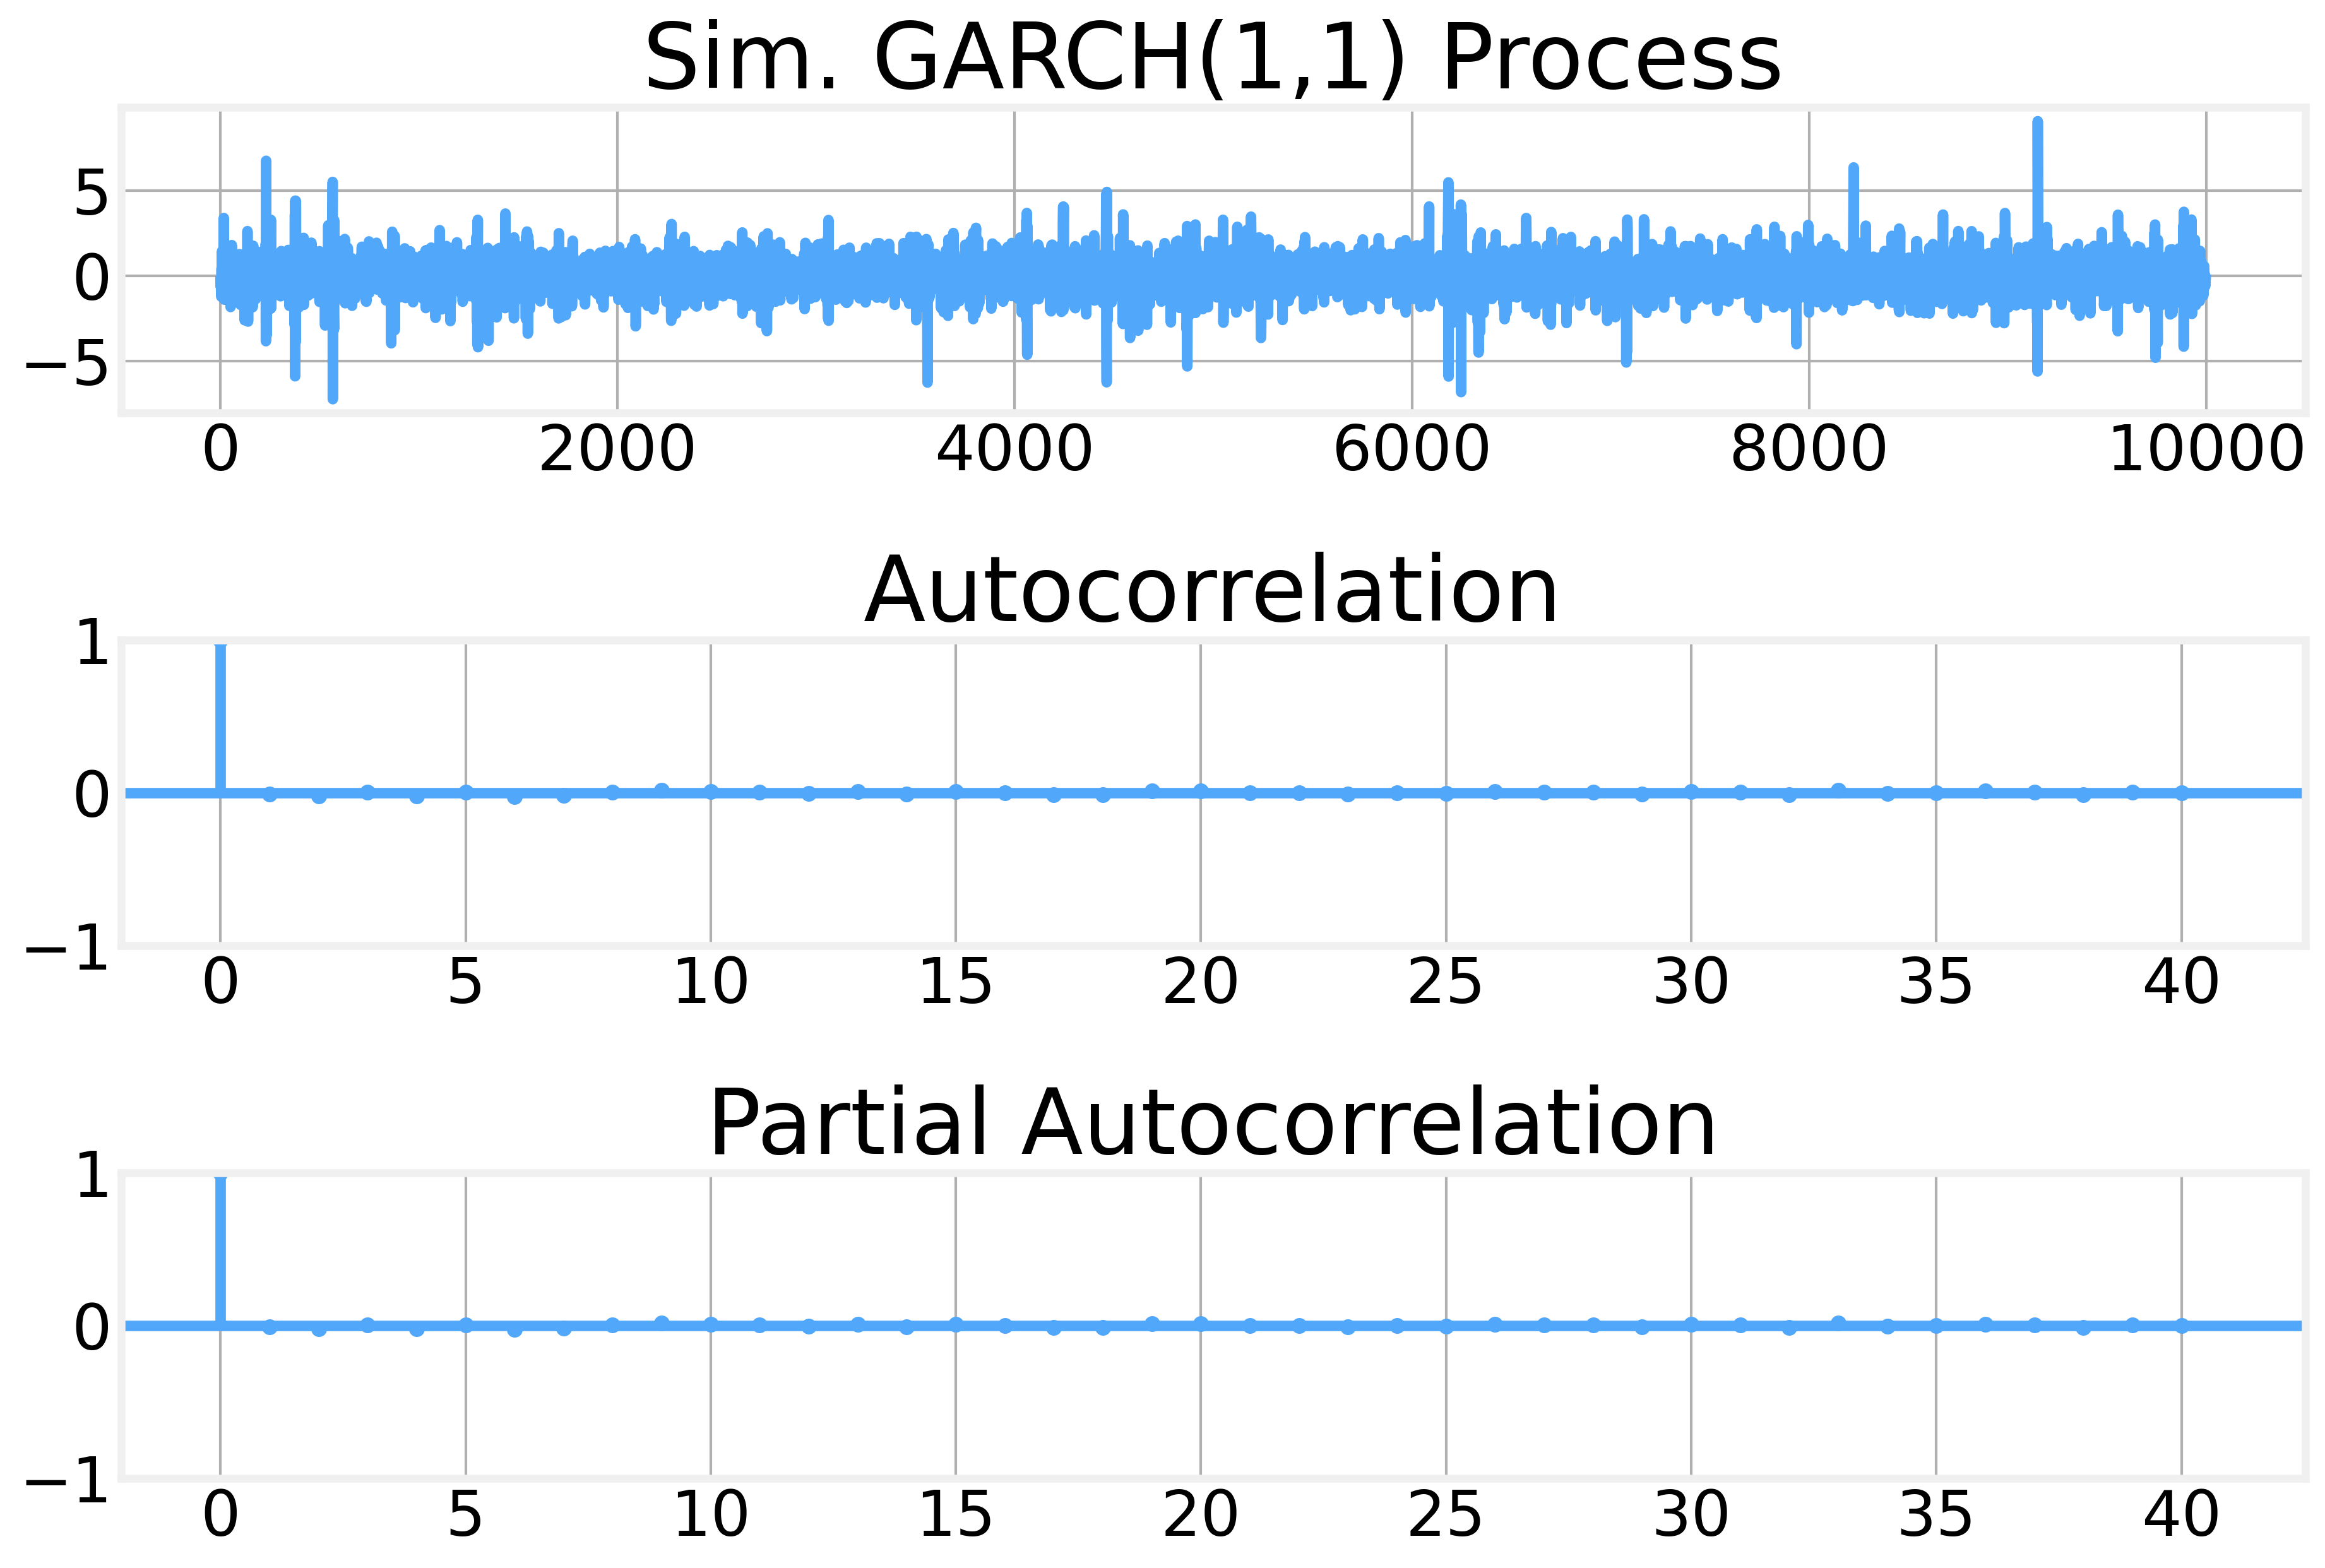

In [32]:
time_series_plot(eps,title='Sim. GARCH(1,1) Process')

In [33]:
djia=pd.read_csv('./data/DJIA.csv',parse_dates=['DATE'],index_col=0,na_values='.')

<AxesSubplot:xlabel='DATE'>

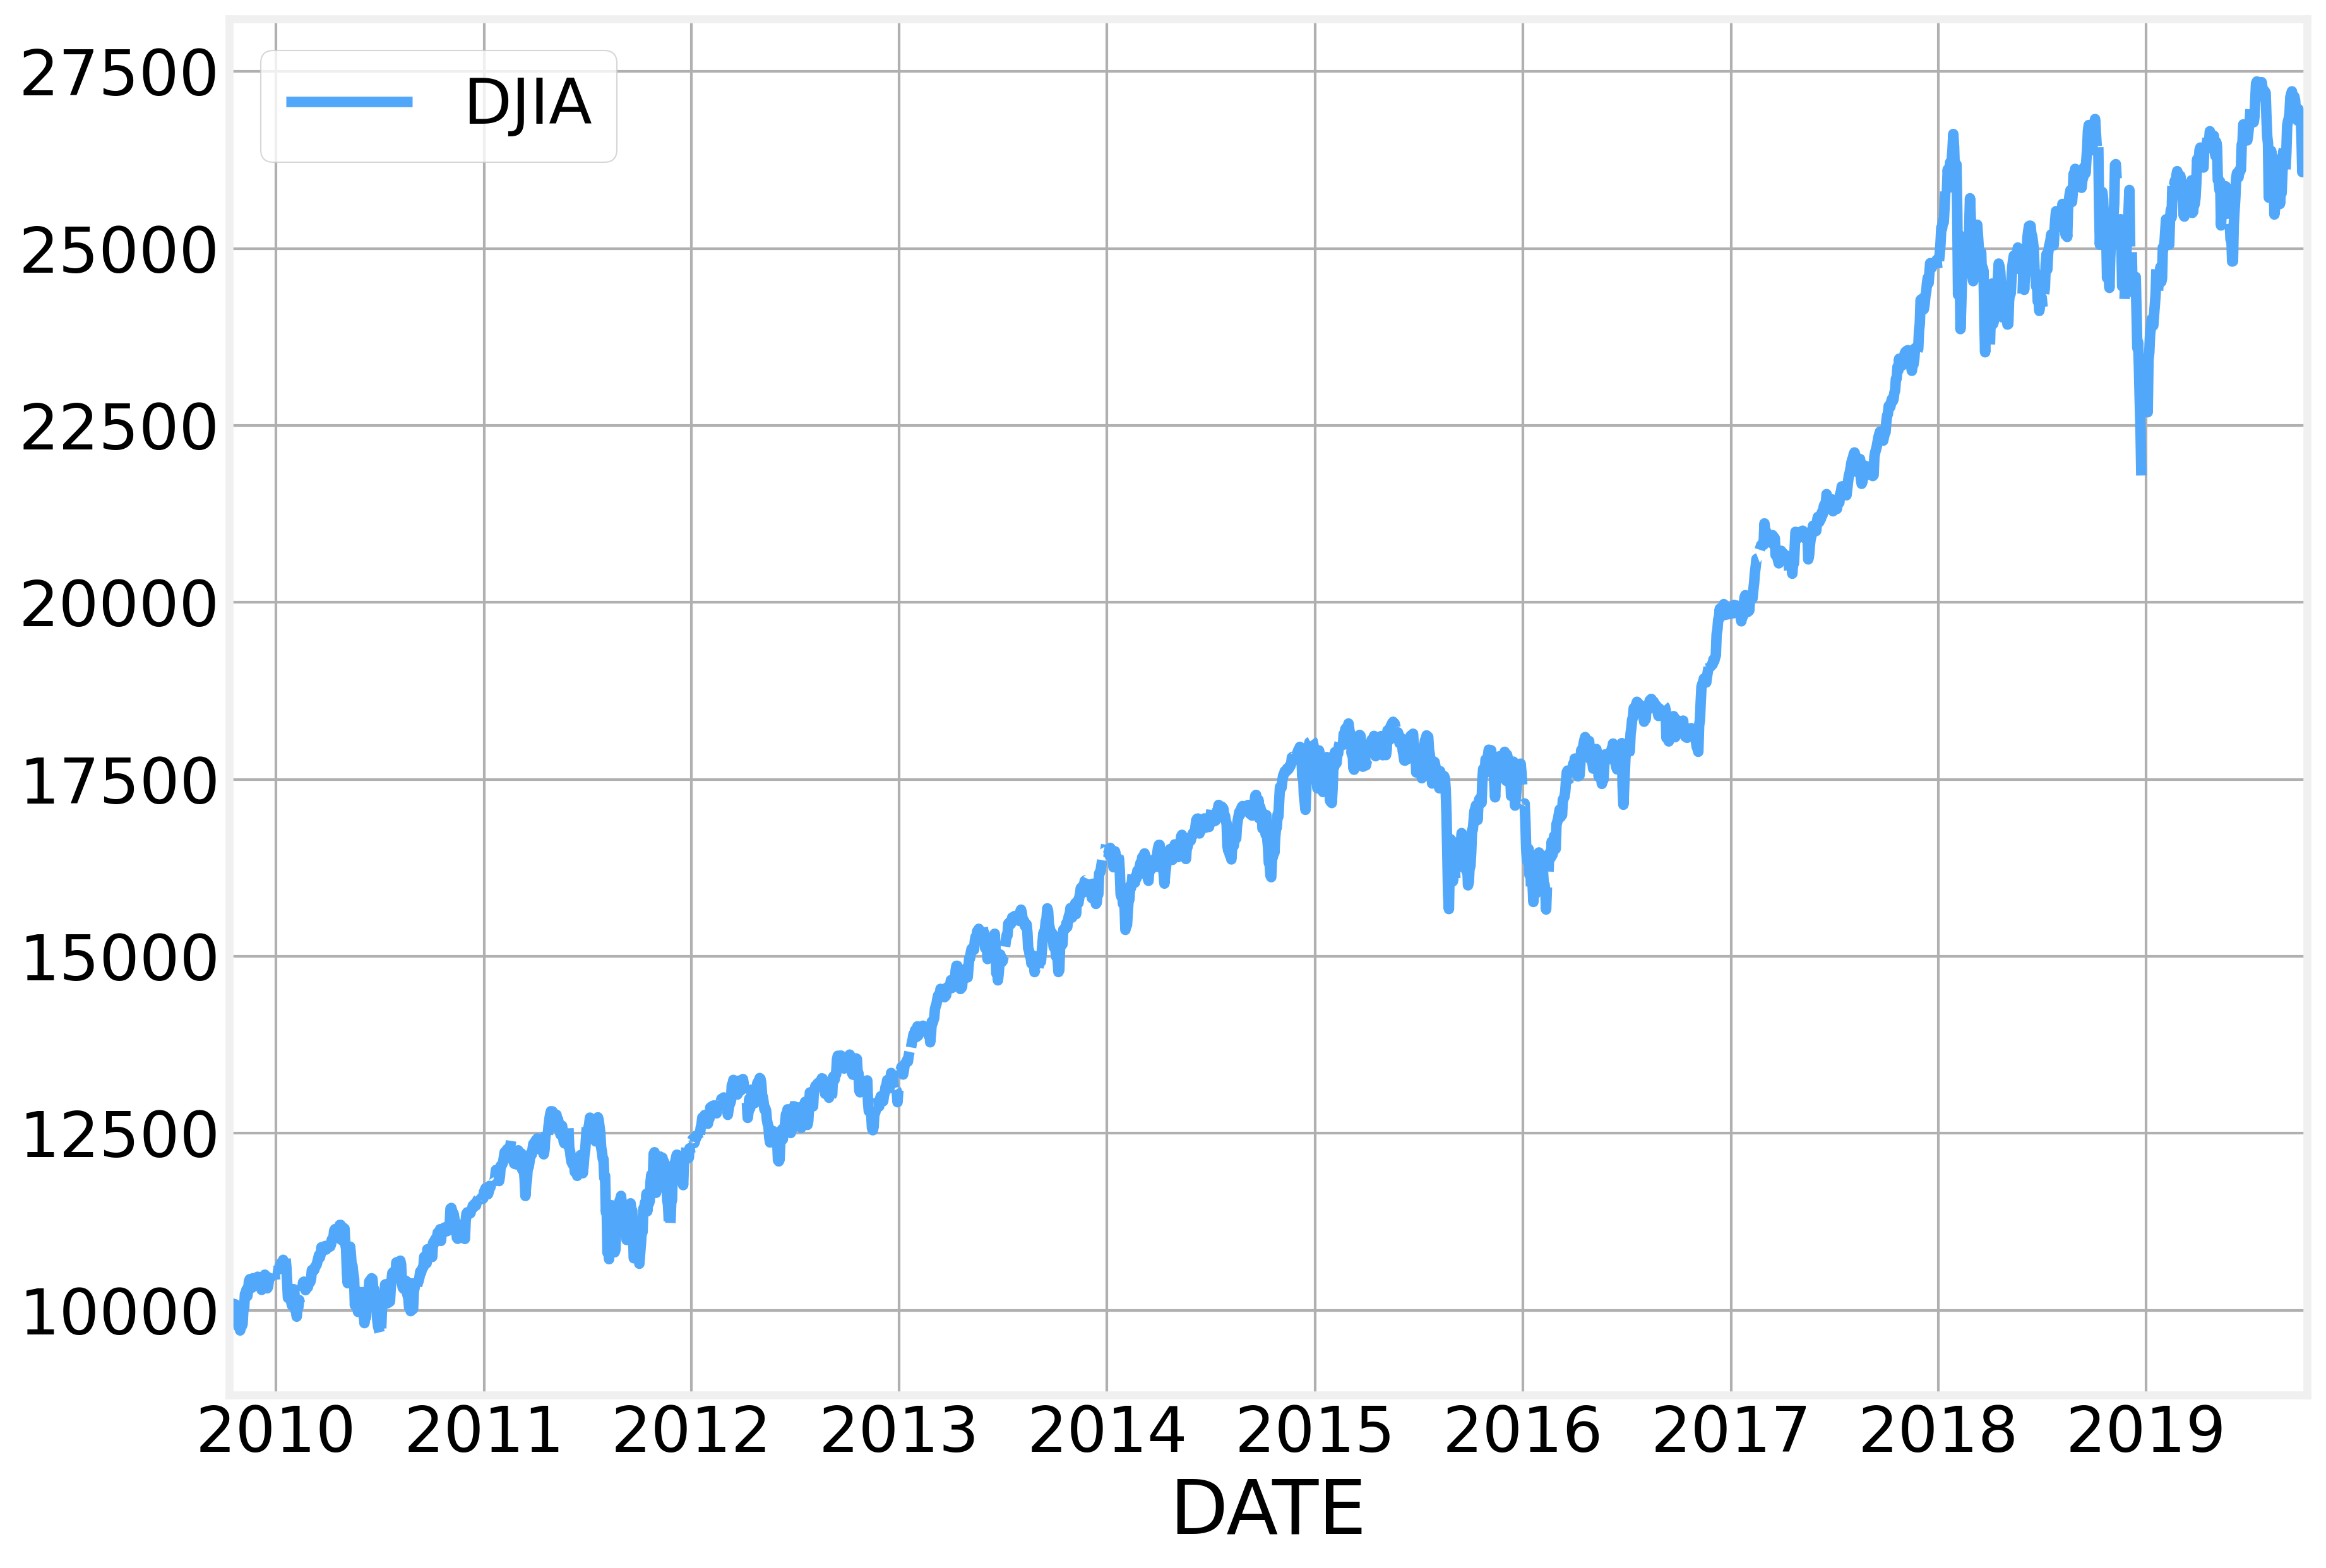

In [34]:
djia.plot()

Text(0, 0.5, 'DoD Return (%)')

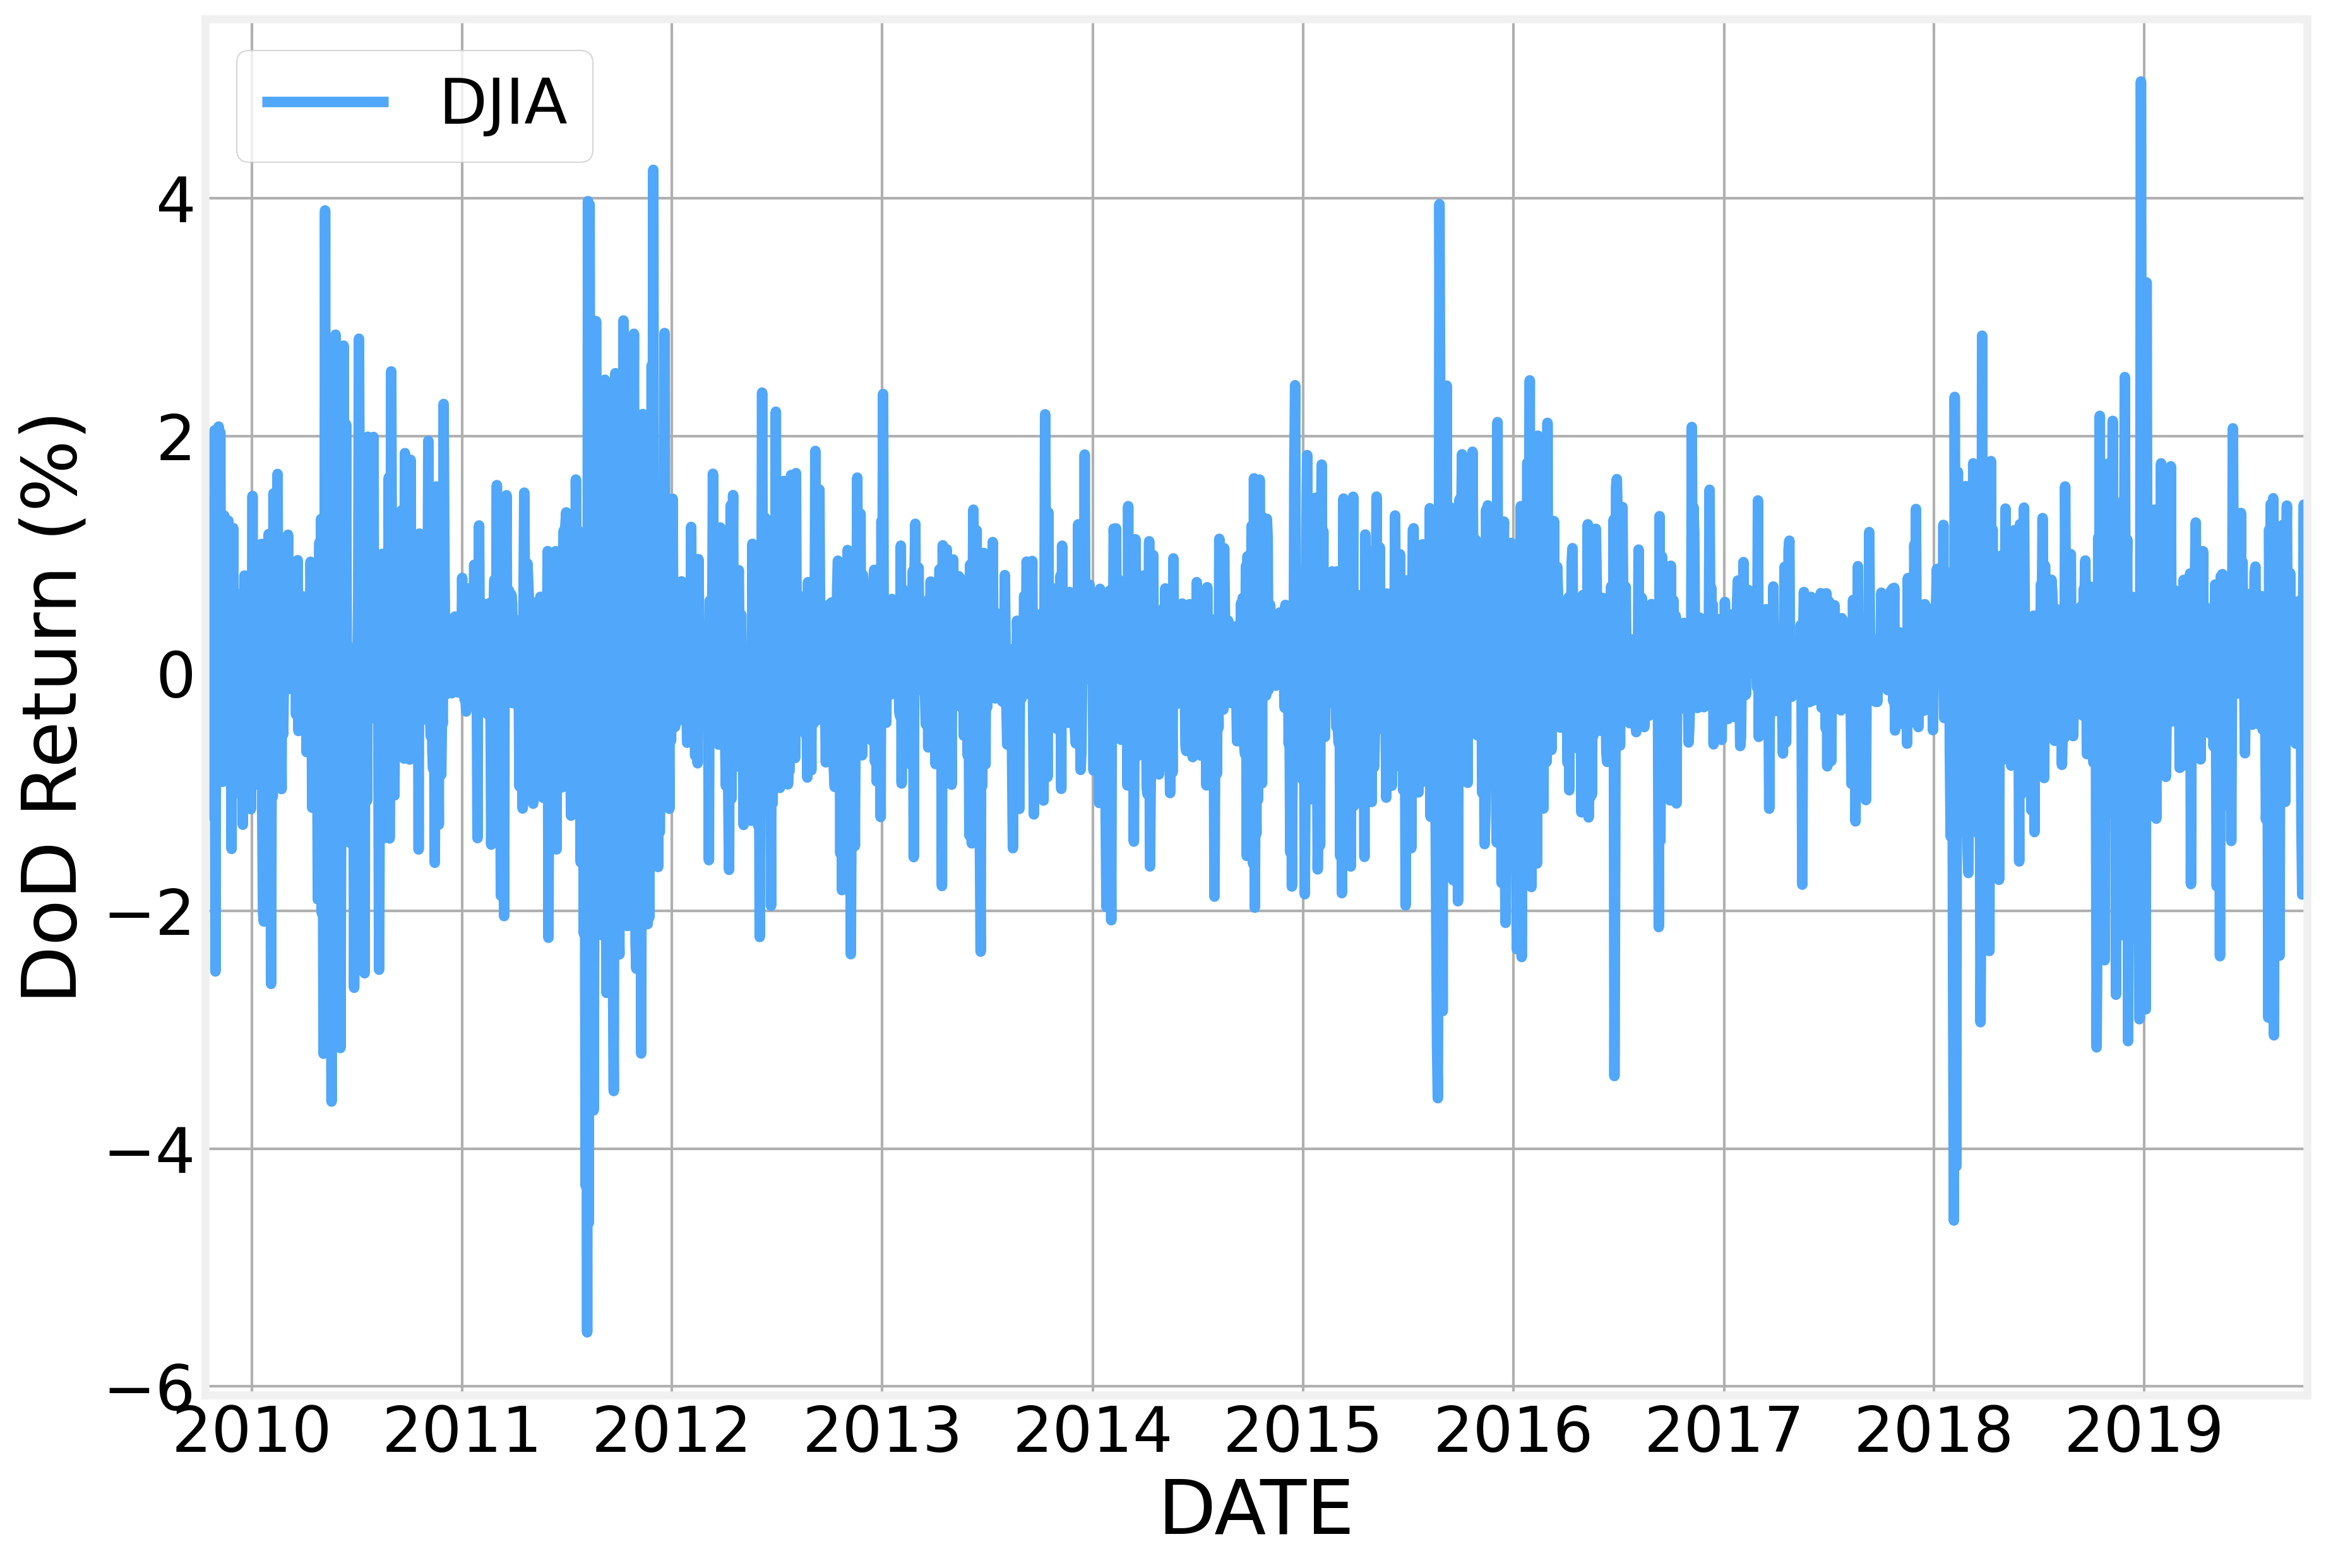

In [35]:
returns=100*djia.pct_change().dropna()
ax= returns.plot()
ax.set_ylabel('DoD Return (%)')

c:\Users\w\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


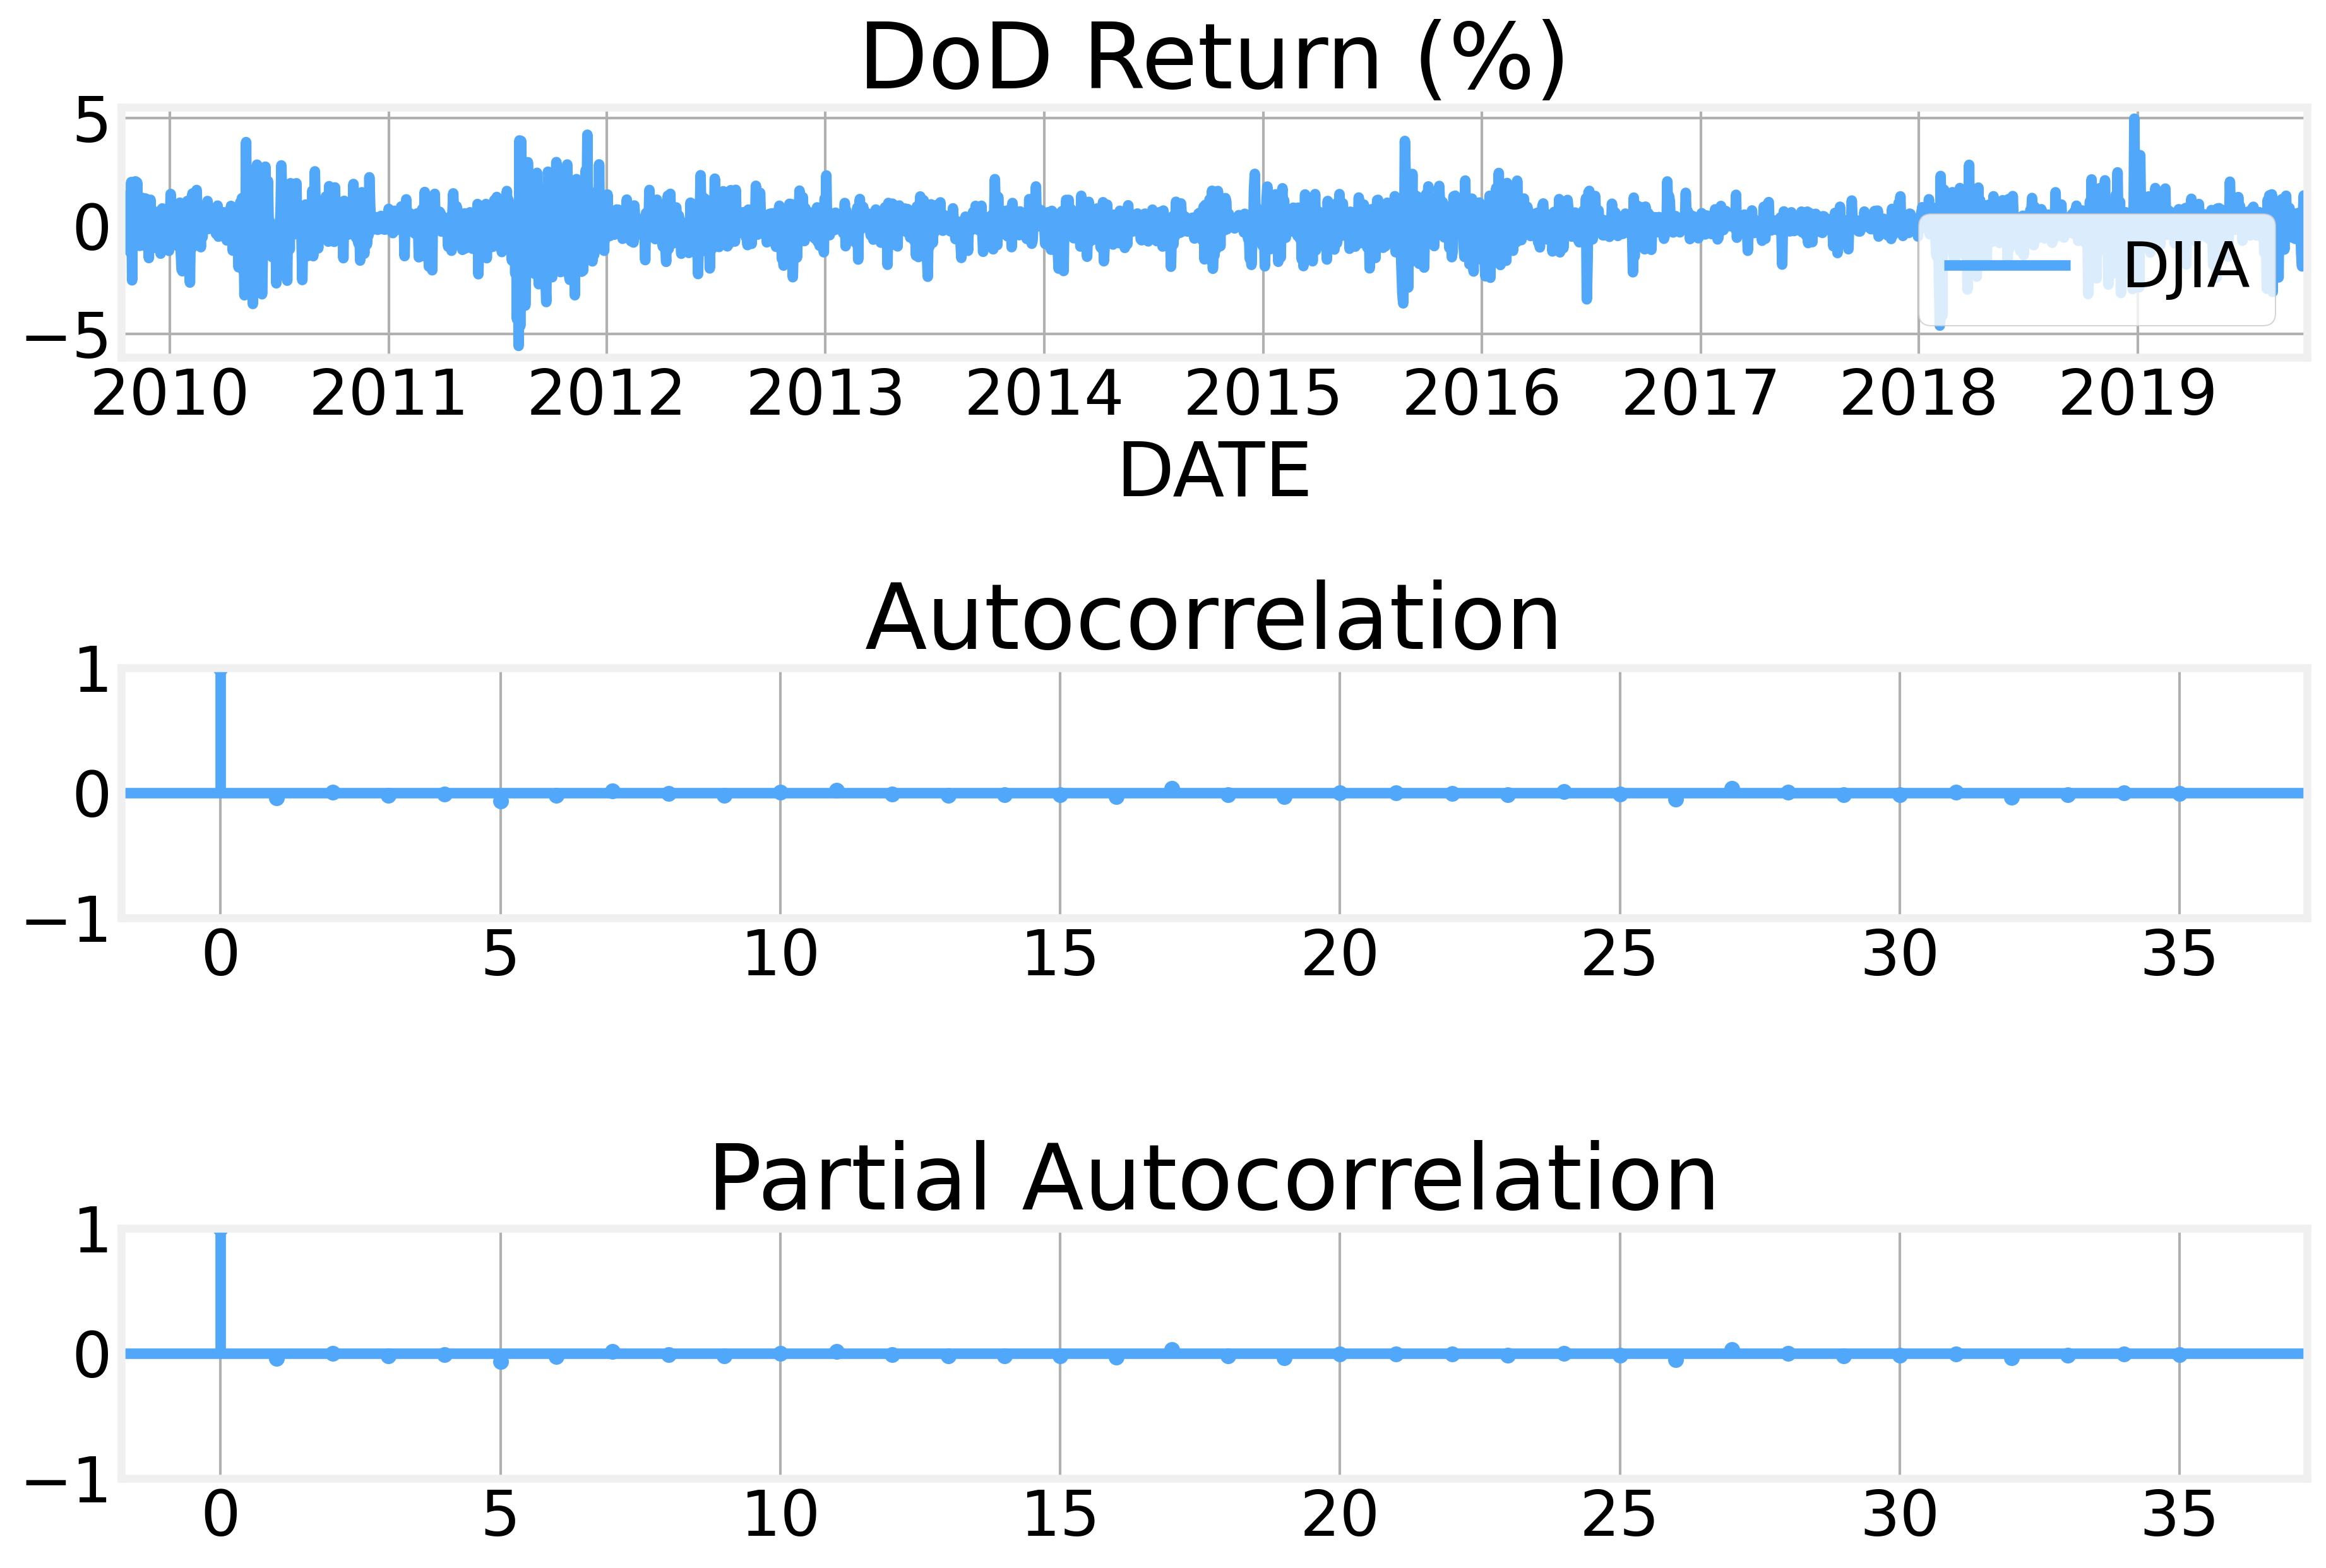

In [36]:
time_series_plot(returns,title='DoD Return (%)')

c:\Users\w\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


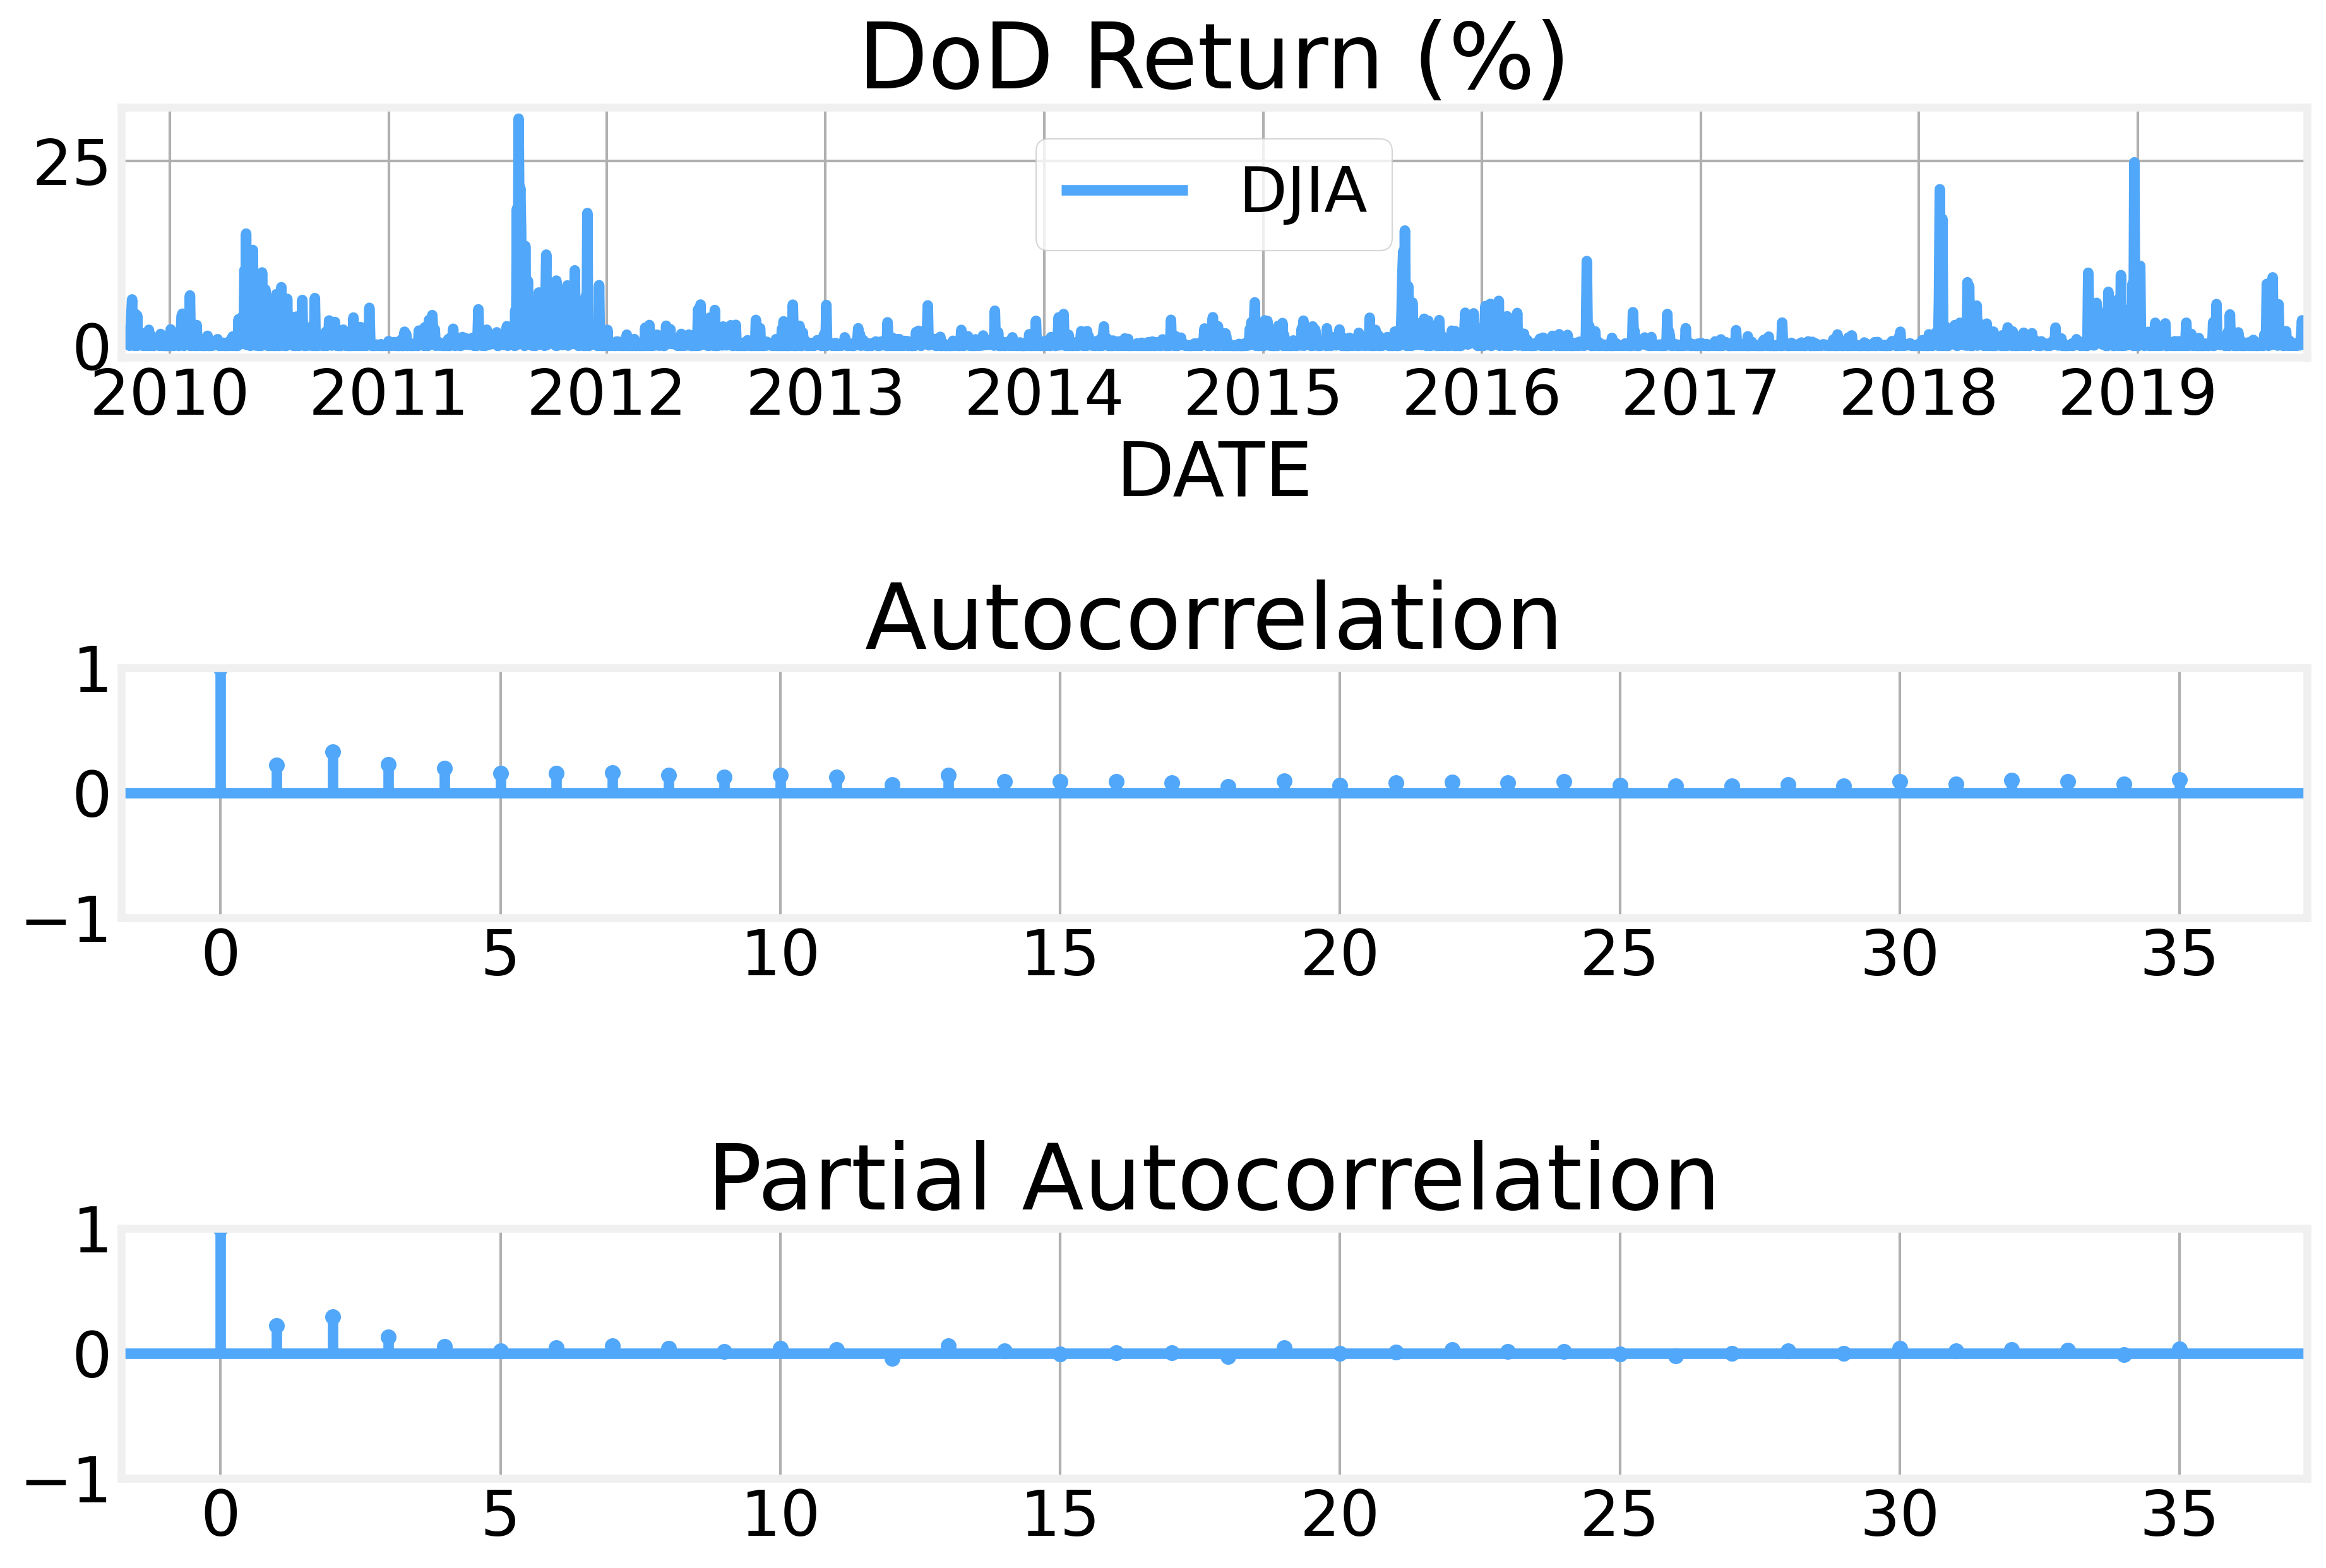

In [37]:
time_series_plot(returns**2,title='DoD Return (%)')

In [38]:
model =arch_model(returns,p=1,o=0,q=1)

In [39]:
model

Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x25856d61f70

In [41]:
results=model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18470.573535942254
Iteration:      2,   Func. Count:     16,   Neg. LLF: 11663561028.36399
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4096.988666834002
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4413.531020542108
Iteration:      5,   Func. Count:     38,   Neg. LLF: 3008.564006295113
Iteration:      6,   Func. Count:     44,   Neg. LLF: 3001.3302366887474
Iteration:      7,   Func. Count:     49,   Neg. LLF: 3000.9345792349345
Iteration:      8,   Func. Count:     54,   Neg. LLF: 3000.923636194031
Iteration:      9,   Func. Count:     59,   Neg. LLF: 3000.9226292583344
Iteration:     10,   Func. Count:     64,   Neg. LLF: 3000.9225225920636
Iteration:     11,   Func. Count:     69,   Neg. LLF: 3000.922518677434
Iteration:     12,   Func. Count:     73,   Neg. LLF: 3000.9225186774597
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3000.922518677434
            Iterations

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   DJIA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3000.92
Distribution:                  Normal   AIC:                           6009.85
Method:            Maximum Likelihood   BIC:                           6033.31
                                        No. Observations:                 2608
Date:                Mon, Jan 02 2023   Df Residuals:                     2607
Time:                        16:22:37   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0744  1.327e-02      5.608  2.043e-08 [4.840e-02,  0.100]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0318  6.646e-03      4.780  1.749e-06 [1.875e-02,4.480e-02]
alpha[1]       0.1587  2.316e-02      6.851  7.310e-12     [  0.113,  0.204]
beta[1]        0.8033  2.280e-02     35.232 6.528e-272     [  0.759,  0.848]
============================================================================

Covariance estimator: robust
"""

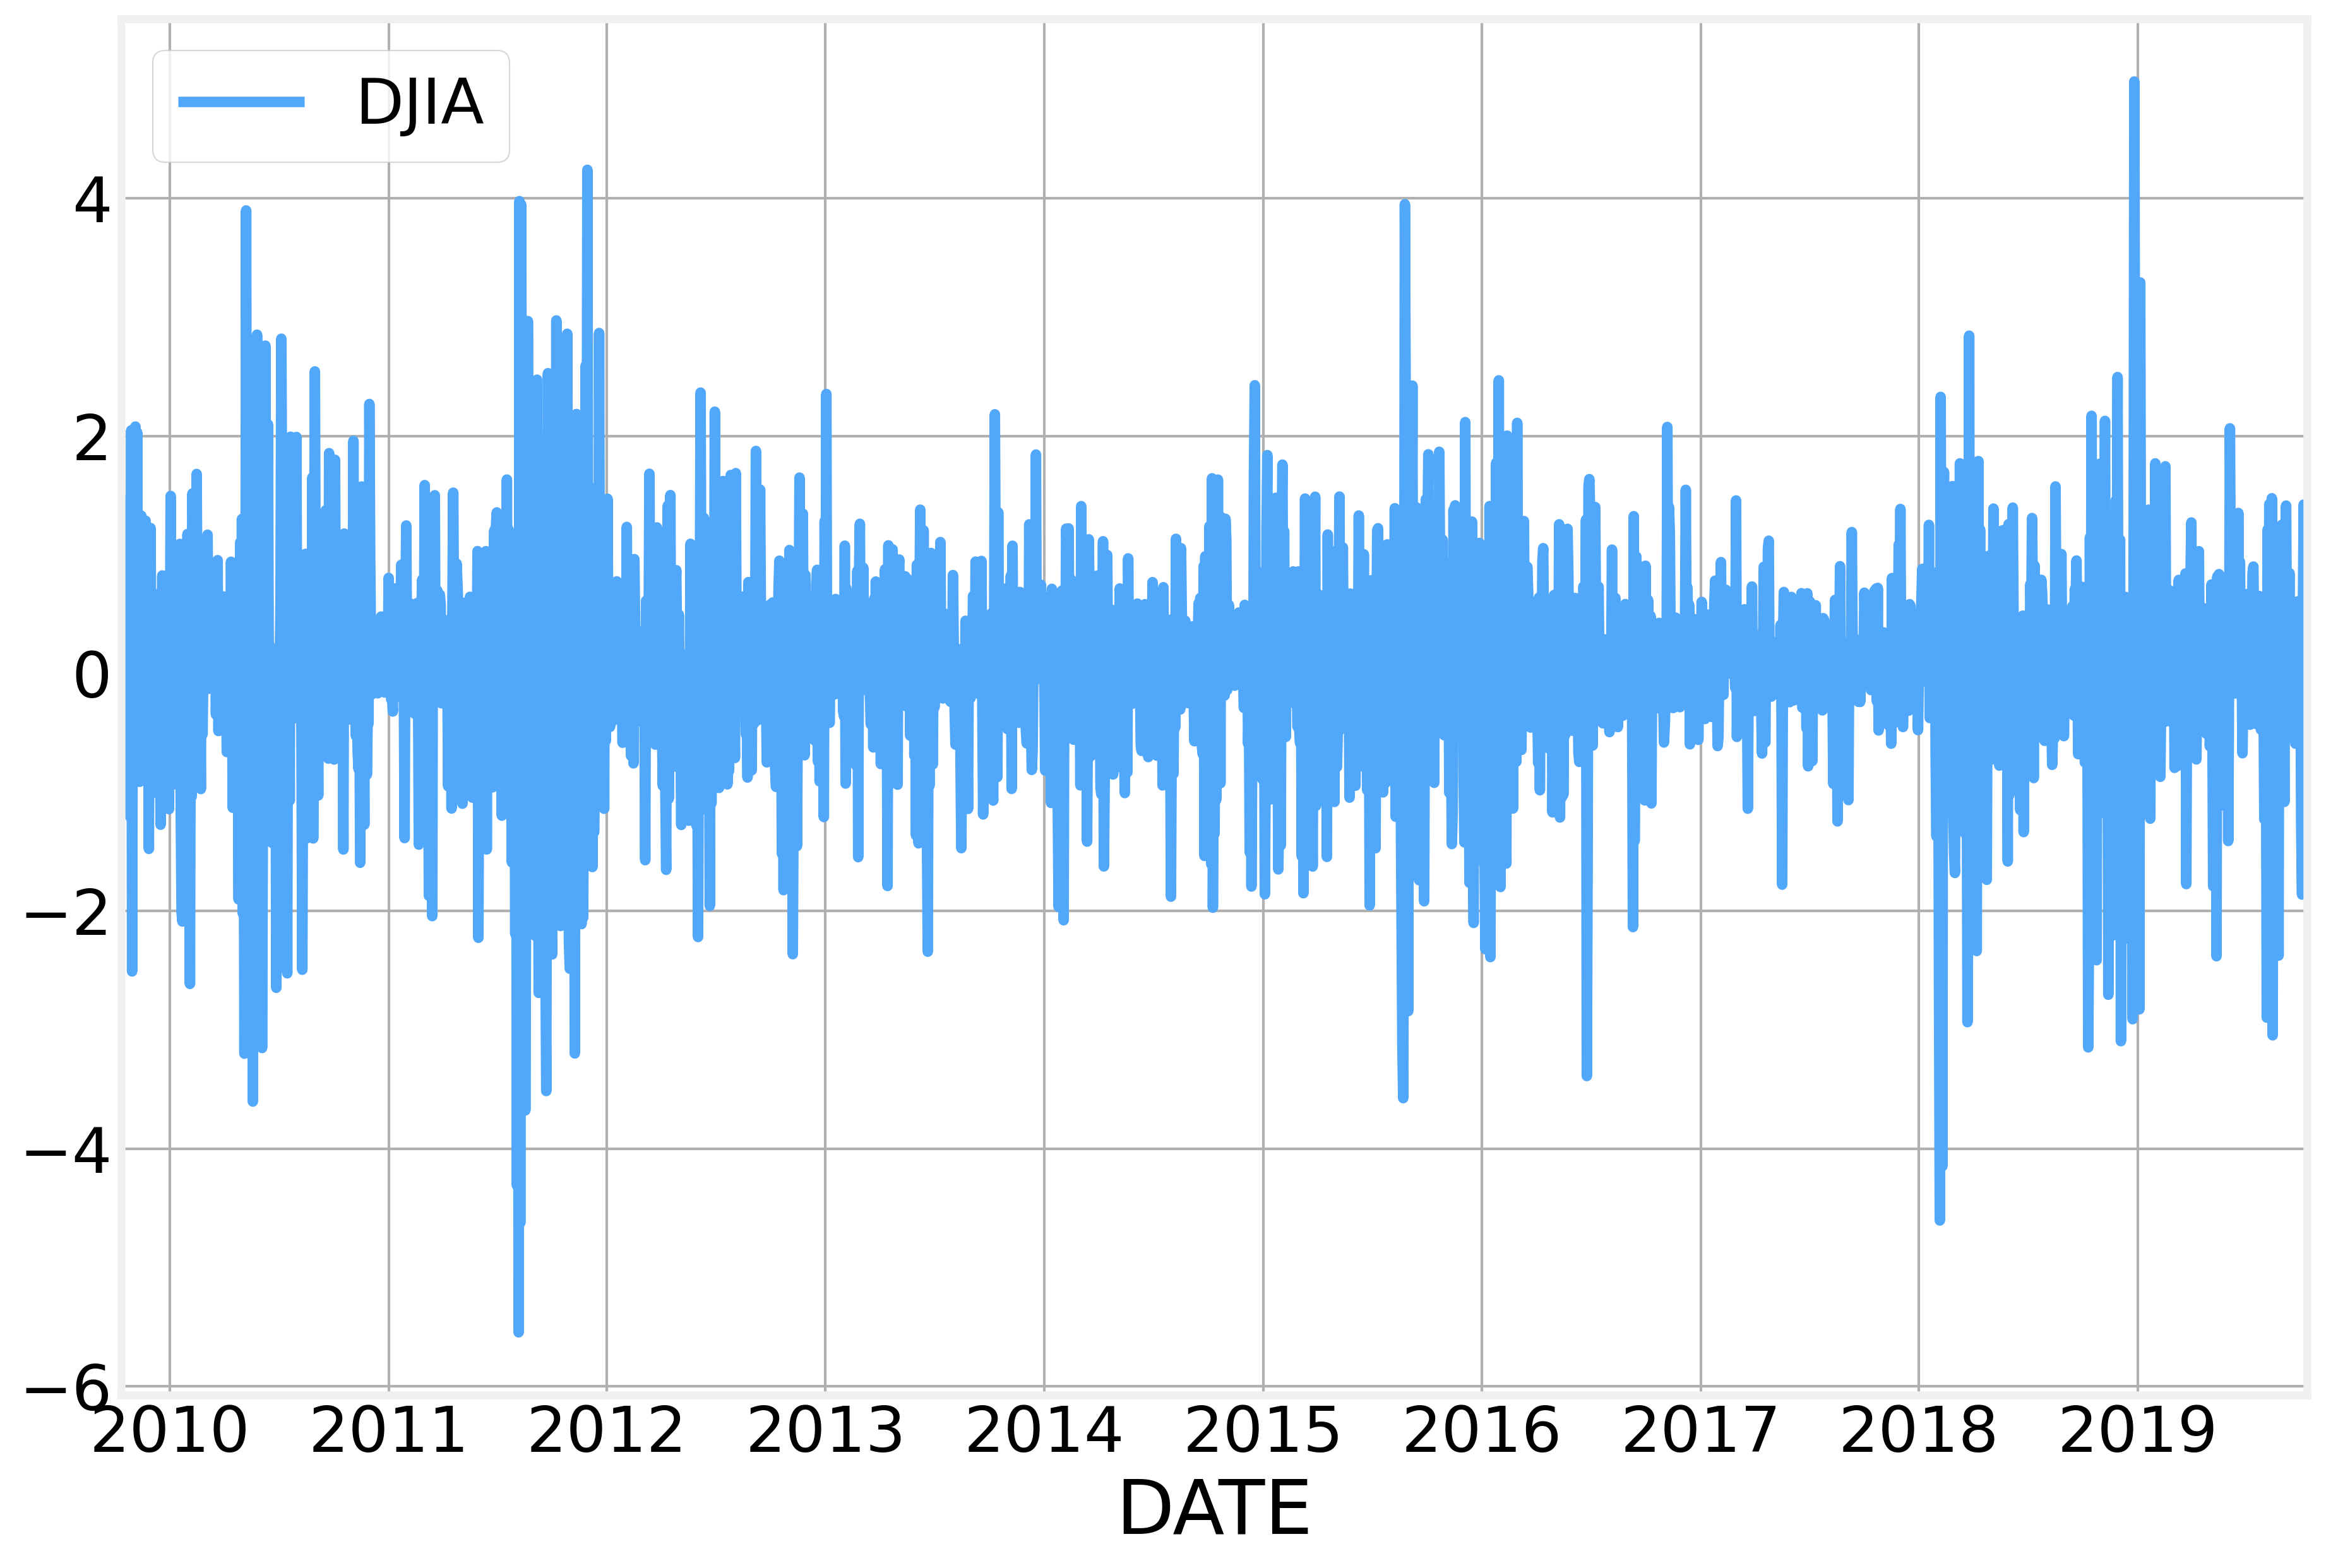

In [48]:
ax=returns.plot()

In [55]:
simulated=model.simulate(params=results.params,nobs=2608)['data']
simulated.index=returns.index

Text(0, 0.5, 'DoD Returns (%)')

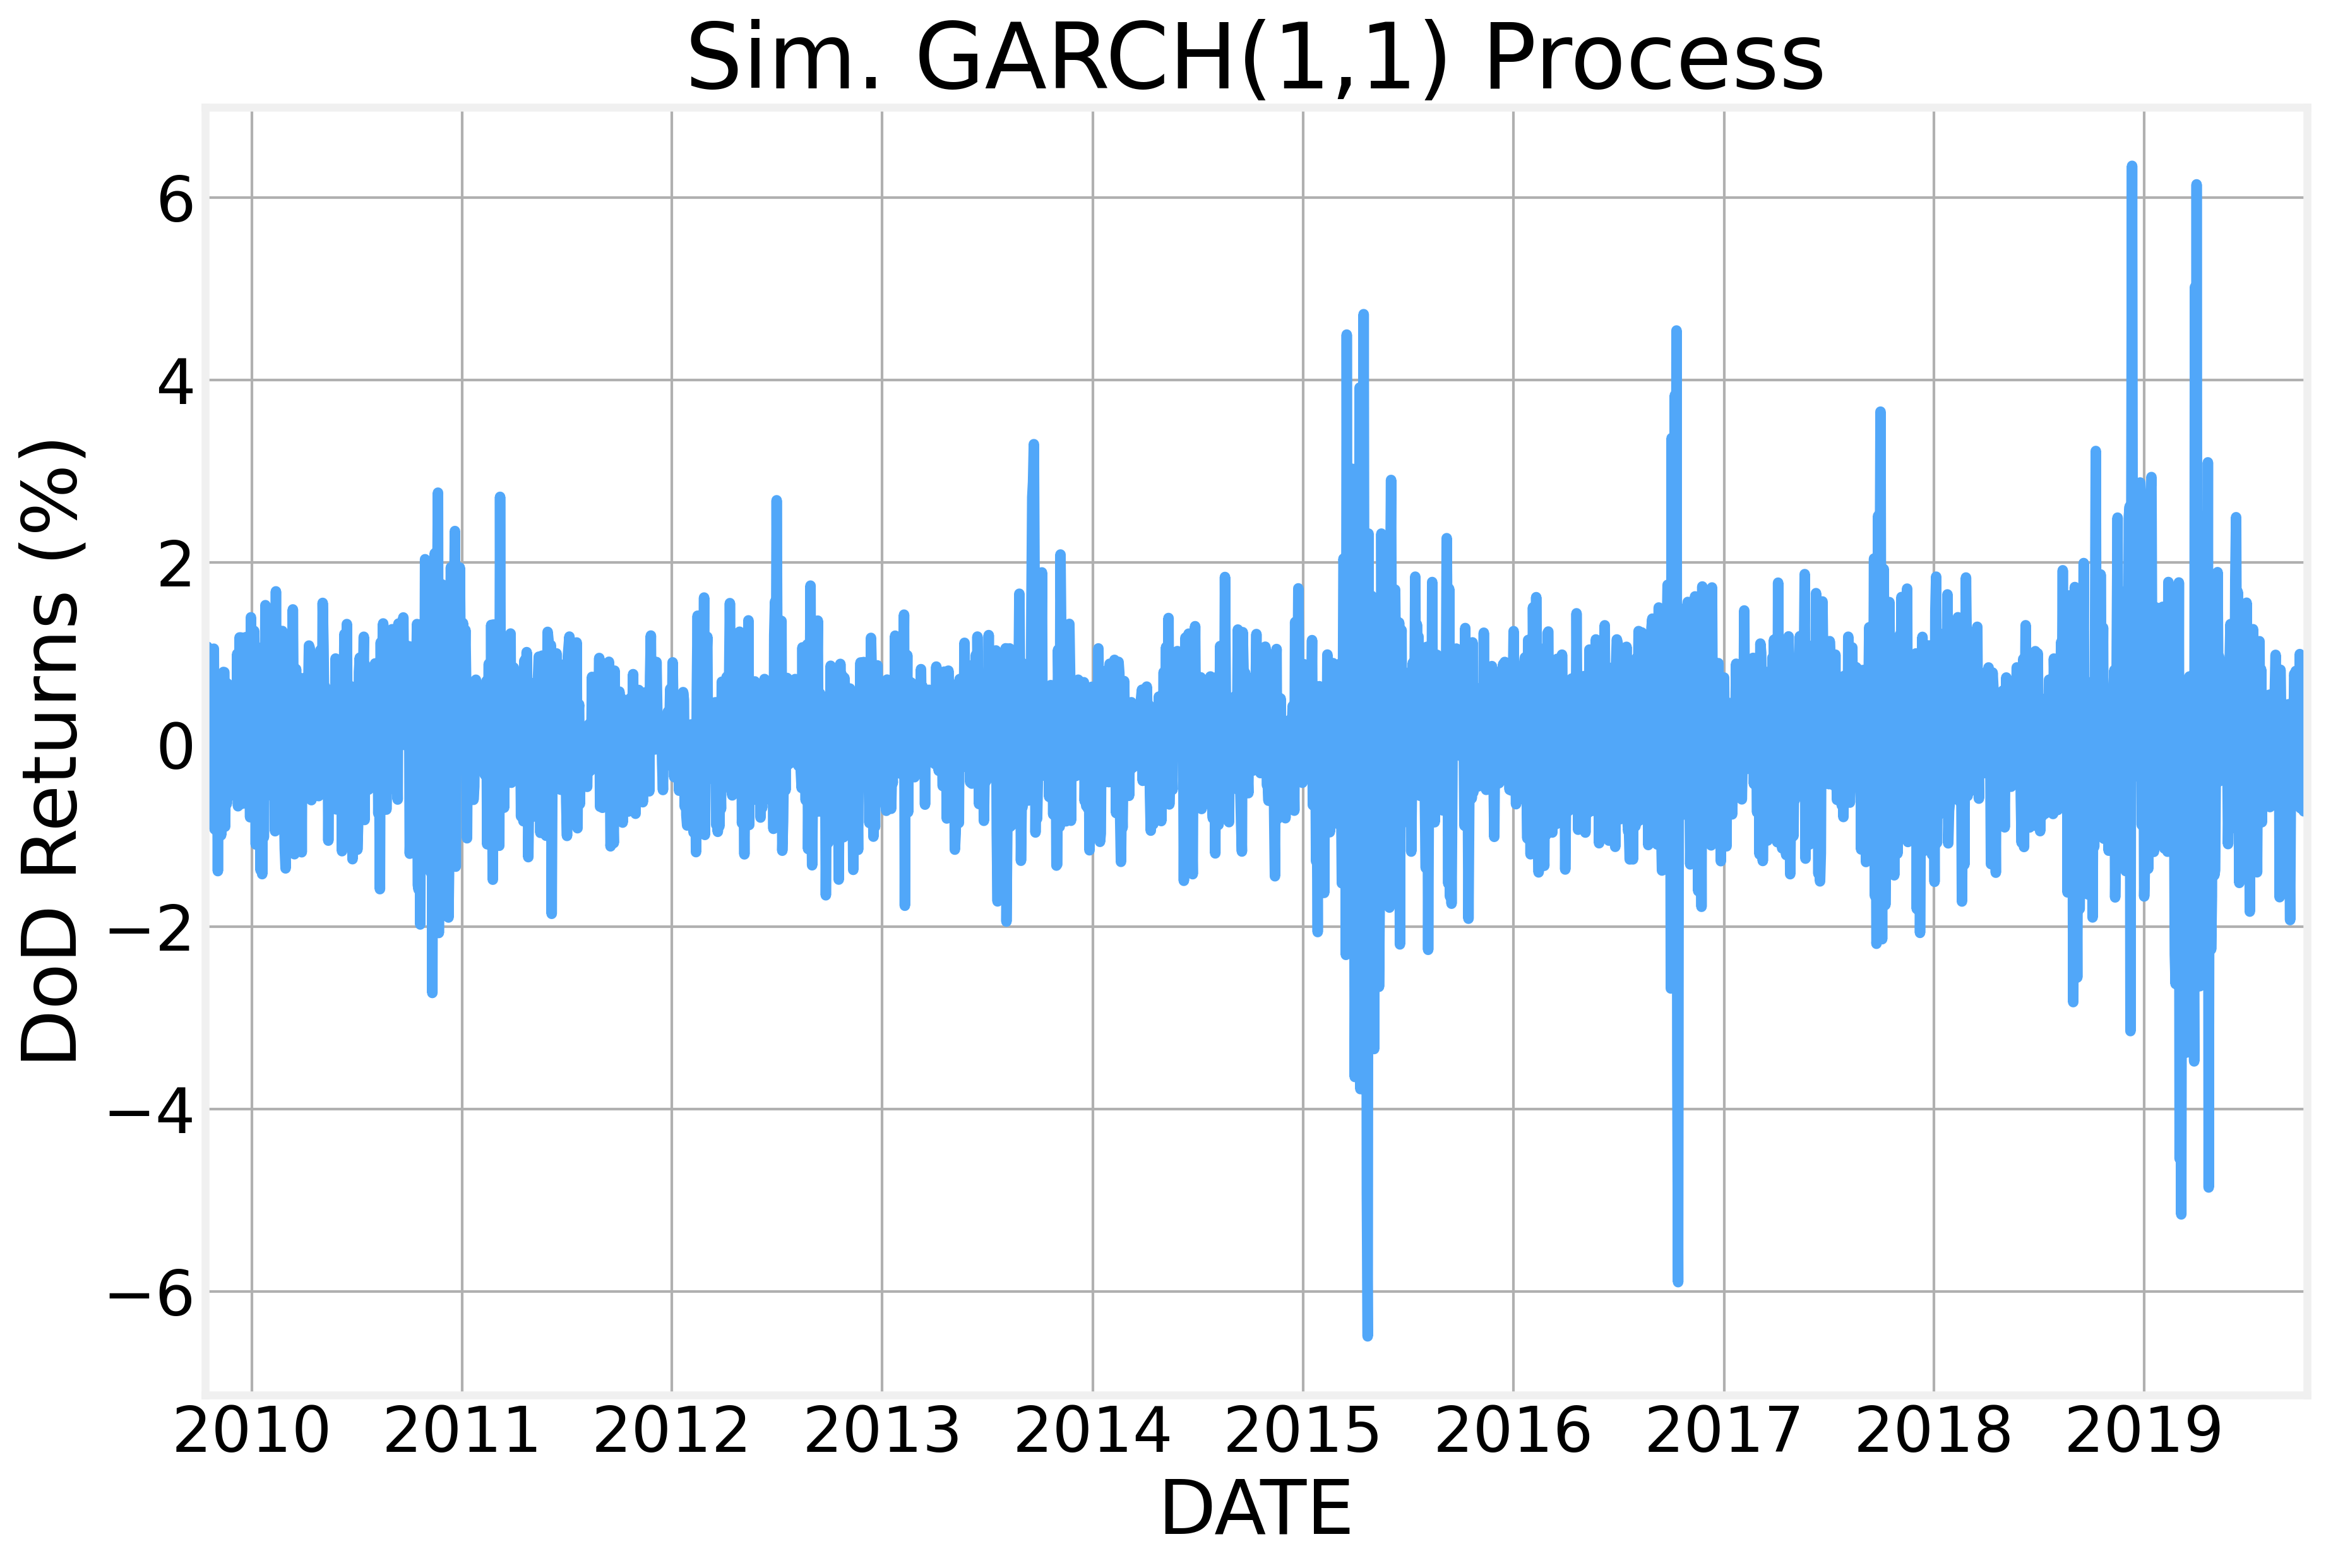

In [52]:
ax=simulated.plot()
ax.set_title('Sim. GARCH(1,1) Process')
ax.set_ylabel('DoD Returns (%)')